In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

import GRABIM as GRABIM

# Plot (external libraries)
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Legend, LegendItem
from bokeh.models import Arrow, NormalHead
from bokeh.models import ColumnDataSource, LabelSet, Text
output_notebook()

# Plot Smith Chart
from matplotlib import pyplot as pp
from smithplot import SmithAxes
%matplotlib notebook
%matplotlib inline

# Problem input
f1 = 5e6; # [Hz] Start frequency
f2 = 5000e6; # [Hz] End frequency
m = 100; # # Number of samples in the band

# Terminations
ZS = 50*np.ones(m, dtype=complex); # [Ohm] Source impedance
ZL = 50*np.ones(m, dtype=complex); # [Ohm] Load impedance

# Candidate topology
L = 10e-9;
C = 1e-12;

x = np.array([[L], [C]]);
code = ['LS', 'CP'];

freq = np.linspace(f1, f2, m);

Loading BokehJS ...

In [2]:
# Circuit analysis
rho = GRABIM.LadderCircuitAnalysis.get_Input_Reflection_Coeff(ZS, ZL, code, x, freq)
print(x)

[[1.e-08]
 [1.e-12]]


In [3]:
GRABIM.Plot_S11_nu(ZS, ZL, code, x, freq)

In [4]:
GRABIM.Plot_S21_S11_dB(ZS, ZL, code, x, freq)

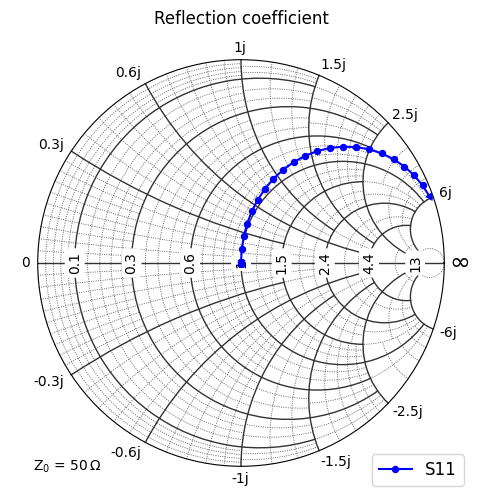

In [5]:
# plot data
pp.figure(figsize=(6, 6))

ax = pp.subplot(1, 1, 1, projection='smith')
pp.plot([10, 100], markevery=1)


pp.plot(rho, 'b', markevery=1, label="S11", equipoints=22, datatype=SmithAxes.S_PARAMETER)

leg = pp.legend(loc="lower right", fontsize=12)
pp.title("Reflection coefficient")

pp.show()